In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytz
import numpy as np

In [2]:
data_posts_hashtags_raw = pd.read_csv("../data/posts_hashtags_as_array.csv")
data_posts_hashtags = data_posts_hashtags_raw.drop(columns = ['id'])
data_posts_hashtags

,text,textLanguage,createTimeISO,isAd,isMuted,diggCount,shareCount,playCount,collectCount,commentCount,...,author_digg,author_region,music_name,music_author,video_duration,video_definition,effect_sticker_names,effect_sticker_useCounts,detailed_mentions_nicknames,location_address
0,@FORMELSKIN | spare 40% auf die ersten zwei Mo...,de,2025-02-18T20:32:13.000Z,False,False,23,0,349,2,2,...,3389,NaN,Messy,Lola Young,20,540p,[],[],[FORMELSKIN],NaN
1,"Drogerieprodukte für alle, die ihre Hautbarrie...",de,2024-11-26T18:51:33.000Z,False,False,9378,212,195300,4607,154,...,11800,NaN,Originalton,Leo | Bessere Haut ✨,72,540p,[],[],[],NaN
2,PART 4 |Kräuterschälkur auf dunkler Haut – mei...,de,2025-02-18T21:57:31.000Z,False,False,32,20,572,5,13,...,25000,NaN,Dreamy Girl,Headphone Chill Girl,90,540p,[],[],[],NaN
3,"Alles fängt im Darm an, habs in meiner Bio ver...",de,2024-12-03T08:28:48.000Z,False,False,10400,118,139700,1102,64,...,29,NaN,inlove,²³,10,540p,[No filter slim],[0],[],NaN
4,Was denkst du darüber? Kommentiere mit „Reset“...,de,2025-02-17T20:11:02.000Z,False,False,5,0,256,2,0,...,674,NaN,Originalton,Laura - Skin & Health Expert,91,540p,[],[],[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6684,#دهون_الانف #basemkhaled123 #ازالة_دهون_الانف ...,un,2025-02-03T16:13:21.000Z,False,False,511000,54100,14500000,26500,2948,...,3813,NaN,Suave,The Pianist & D'Michel leb,28,480p,[],[],[],"Alexandria, Egypt"
6685,#grwm #fypage,un,2025-03-14T20:44:57.000Z,False,NaN,38,2,1093,3,2,...,37600,NaN,for the girlies,Mercedes ;),71,540p,[],[],[],"Trabzon, Türkiye"
6686,"UBUR UBUR IKAN LELE, GIMANA RASANYA JADI TIKTO...",id,2025-01-29T20:04:34.000Z,False,False,310300,28300,3700000,5212,2055,...,3273,NaN,SUKI! CHOver. KOUSHIKIBAISOKU,Cho Tokimeki Sendenbu,22,540p,[],[],[],"5R65+C7Q, Bagan Kota, Bangko, Rokan Hilir Rege..."
6687,Idée de routine 💕 #acne #mali #skincare,fr,2025-03-25T23:30:21.000Z,False,NaN,15,2,216,3,5,...,4015,NaN,Baby (Is it a Crime),Rema,21,540p,"[Green Screen Video,Inverted]","[0,0]",[],Mali


12271 rows

**Data preperation**

In [3]:
# Count NaNs per column
nan_counts = data_posts_hashtags.isna().sum()

# Count unique values per column
unique_counts = data_posts_hashtags.nunique()

# Combine into one table
summary = pd.DataFrame({
    'NaNs': nan_counts,
    'Unique Values': unique_counts
})

print(summary)

                             NaNs  Unique Values
text                           74           6572
textLanguage                    1             58
createTimeISO                   0           6687
isAd                            0              2
isMuted                      2940              2
diggCount                       0           3678
shareCount                      0           2519
playCount                       0           3737
collectCount                    0           3210
commentCount                    0           1790
isSlideshow                     0              1
isPinned                        0              1
isSponsored                     0              2
hashtags                        0           6134
searchHashtag_name              0              4
searchHashtag_views             0             74
author_nickName                 0           3983
author_verified                 0              2
author_signature              282           3877
author_privateAccoun

isMuted, author_region, location_address, author_ttSeller have a lot of NaNs. author_region is always empty


In [4]:
#Drop author region
data_posts_hashtags = data_posts_hashtags_raw.drop(columns = ['author_region'])

In [5]:
data_posts_hashtags["createTimeISO"] = pd.to_datetime(data_posts_hashtags["createTimeISO"])
data_posts_hashtags["country"] = data_posts_hashtags["location_address"].str.extract(r',\s*([^,]+)$')


**Language distribution**

In [6]:
# Count languages
lang_counts = data_posts_hashtags['textLanguage'].value_counts()

# Convert to DataFrame and calculate percentage
lang_dist = lang_counts.reset_index()
lang_dist.columns = ['Language', 'Count']
lang_dist['Percentage'] = (lang_dist['Count'] / lang_dist['Count'].sum()) * 100

# Sort by most common
lang_dist = lang_dist.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Display top 5
lang_dist.head(5)

,Language,Count,Percentage
0,en,2944,44.019139
1,de,2107,31.504187
2,un,736,11.004785
3,id,185,2.766148
4,fr,162,2.422249


75% of all posts are in German in English therefore we will from know on limit our analysis to those two languages

In [7]:
data_english = data_posts_hashtags[data_posts_hashtags.textLanguage.isin(['en'])]
data_german = data_posts_hashtags[data_posts_hashtags.textLanguage.isin(['de'])]

**Content with advertisements**

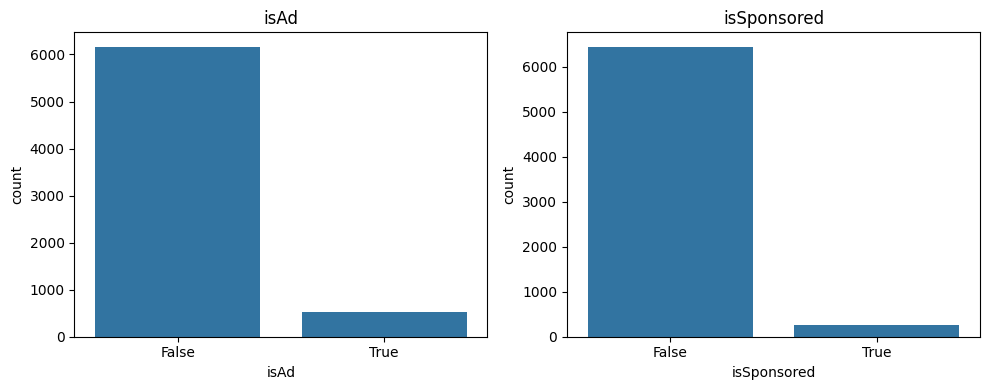

In [8]:
cols = ["isAd", "isSponsored"]

plt.figure(figsize=(10, 4))
for i, col in enumerate(cols, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=col, data=data_posts_hashtags)
    plt.title(col)

plt.tight_layout()
plt.show()

In [9]:
(data_posts_hashtags["isAd"] == data_posts_hashtags["isSponsored"]).sum()

(data_posts_hashtags["isAd"] != data_posts_hashtags["isSponsored"]).sum()

np.int64(582)

Nearly all of the data are not ads nor sponsored. 582 rows is_ad and is_sponsred is different. This makes only 5.5%. Meaning for 95% of the data is_ad equals to is_sponsored

**Success metrics**

In [10]:
metrics = ["playCount", "diggCount", "commentCount", "collectCount", "shareCount"]

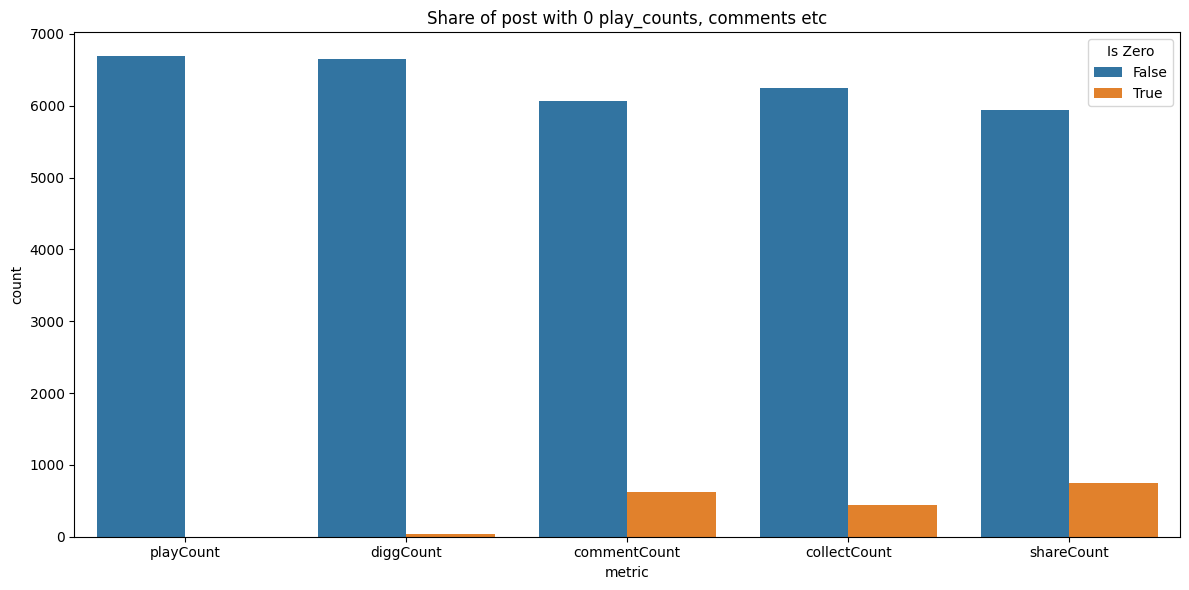

In [11]:
# Create a melted DataFrame with a new column "is_zero"
metrics_is_zero = data_posts_hashtags[metrics].melt(var_name="metric", value_name="value")
metrics_is_zero["is_zero"] = metrics_is_zero["value"] == 0

plt.figure(figsize=(12, 6))
sns.countplot(data=metrics_is_zero, x="metric", hue="is_zero")
plt.title("Share of post with 0 play_counts, comments etc")
plt.legend(title="Is Zero")
plt.tight_layout()
plt.show()

In [12]:
(data_posts_hashtags["playCount"] == 0).sum()

np.int64(1)

We can see that there is a quite high share of posts which have no comments etc

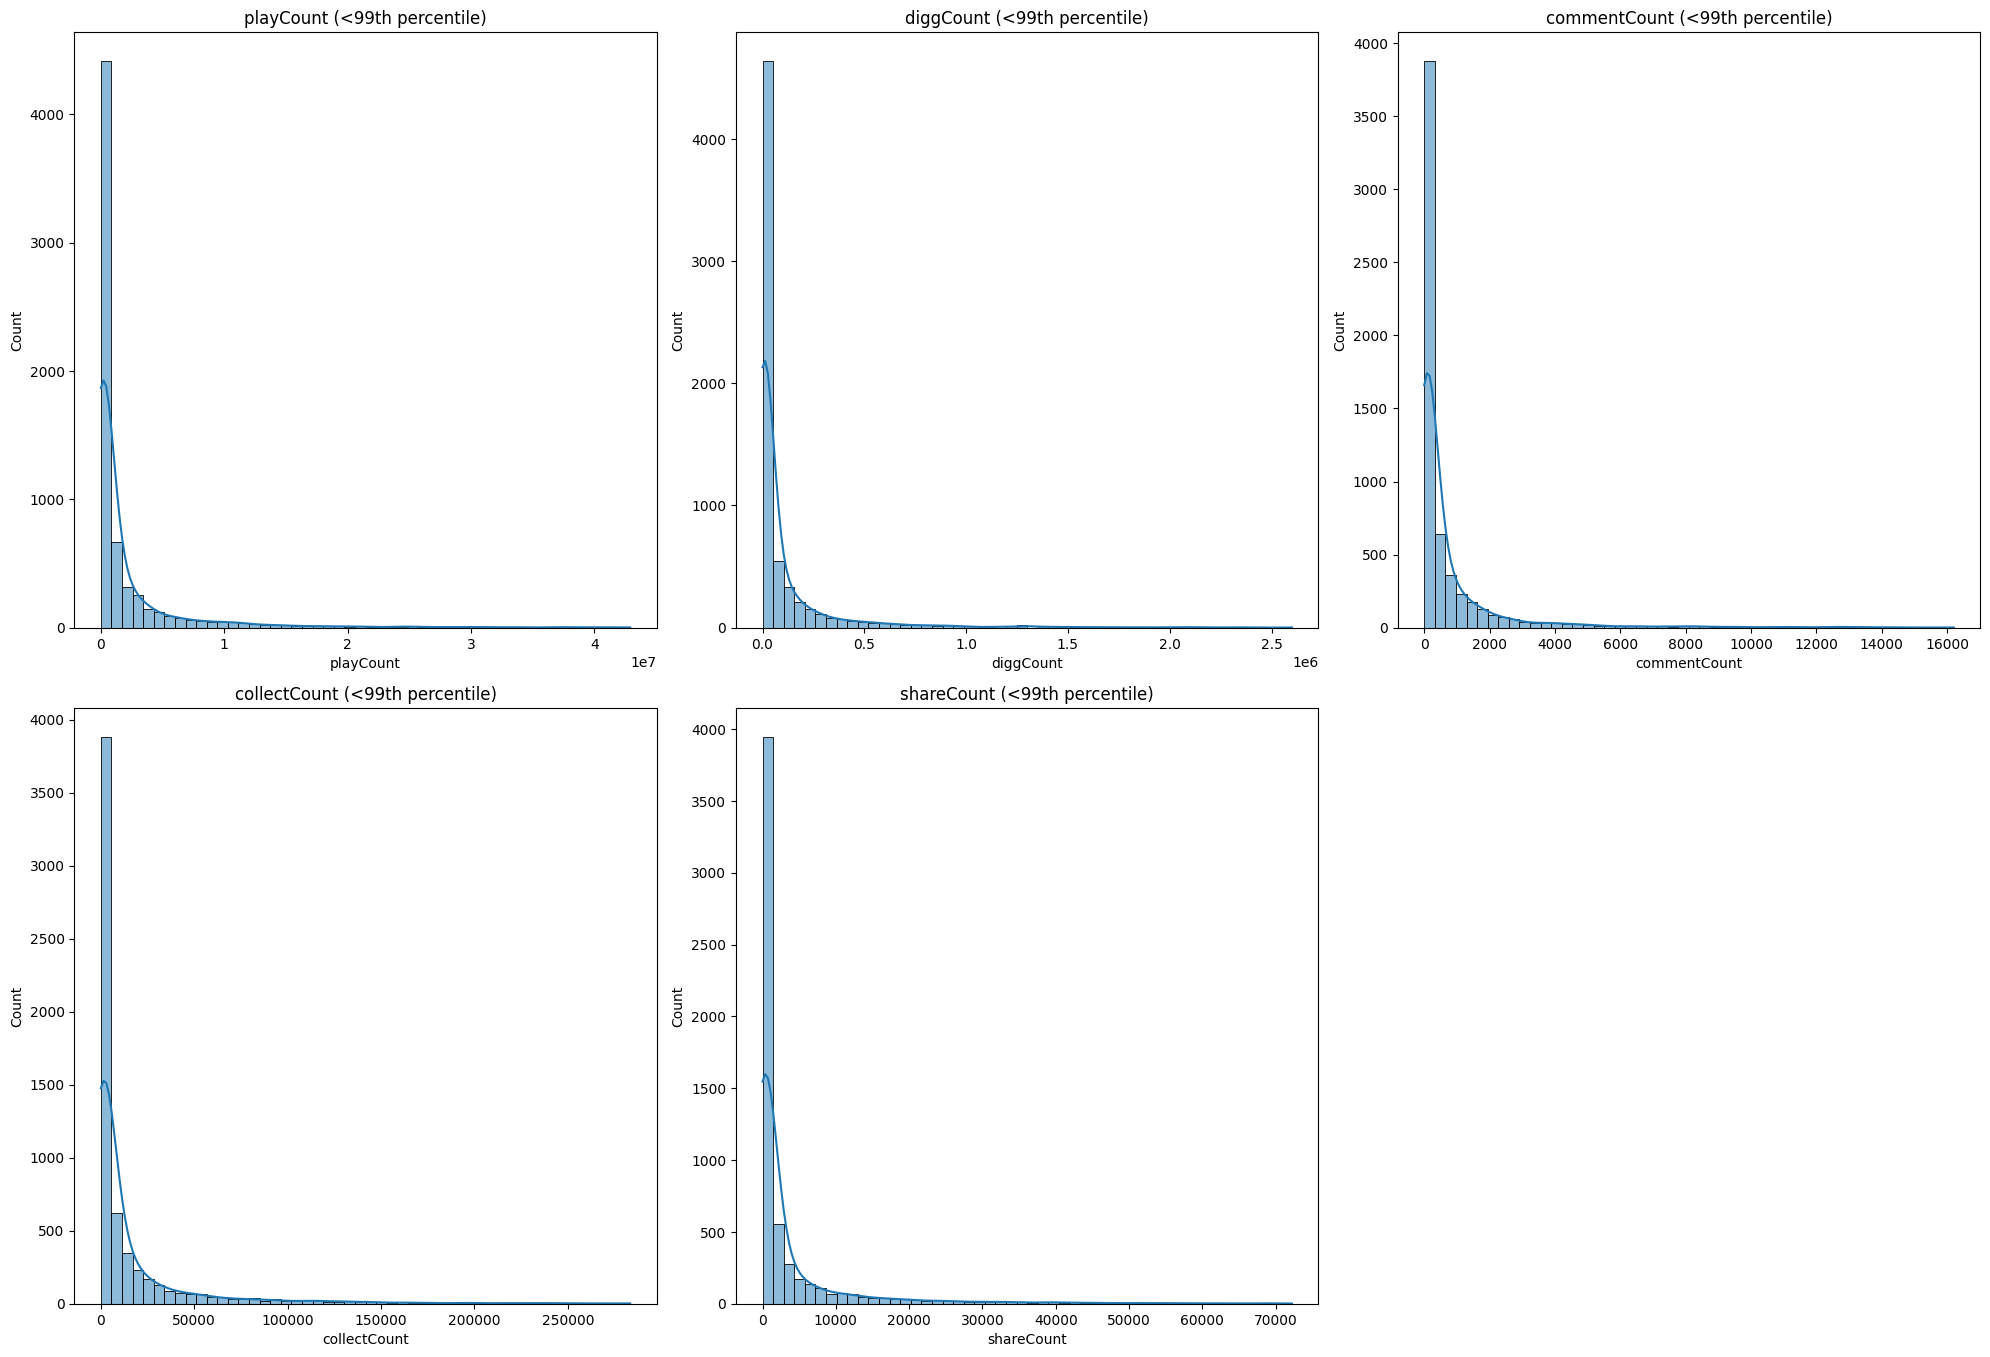

In [13]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(metrics, 1):
    plt.subplot(3, 3, i)
    q99 = data_posts_hashtags[col].quantile(0.99)
    filtered = data_posts_hashtags[(data_posts_hashtags[col] > 0) & (data_posts_hashtags[col] < q99)]
    sns.histplot(filtered[col], bins=50, kde=True)
    plt.title(f"{col} (<99th percentile)")

plt.tight_layout()
plt.show()

The success metrics are gighly skweded 

In [14]:
for col in metrics:
    q99 = data_posts_hashtags[col].quantile(0.99)
    max_val = data_posts_hashtags[col].max()
    print(f"{col}: 99th perc.:{q99:.0f}, max: {max_val}")

playCount: 99th perc.:42924000, max: 257000000
diggCount: 99th perc.:2700000, max: 18900000
commentCount: 99th perc.:16212, max: 242400
collectCount: 99th perc.:283748, max: 1900000
shareCount: 99th perc.:72404, max: 2800000


**Video duration**

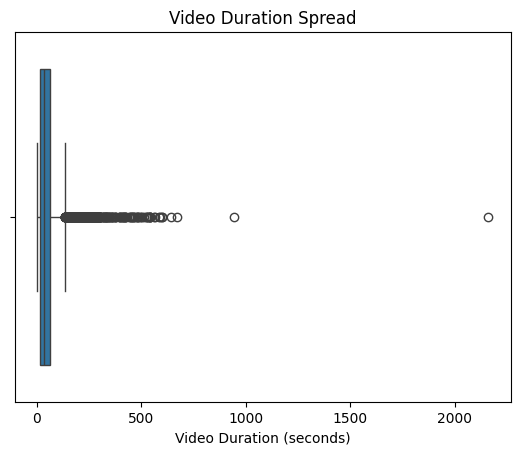

In [15]:
sns.boxplot(x=data_posts_hashtags["video_duration"])
plt.title("Video Duration Spread")
plt.xlabel("Video Duration (seconds)")
plt.show()

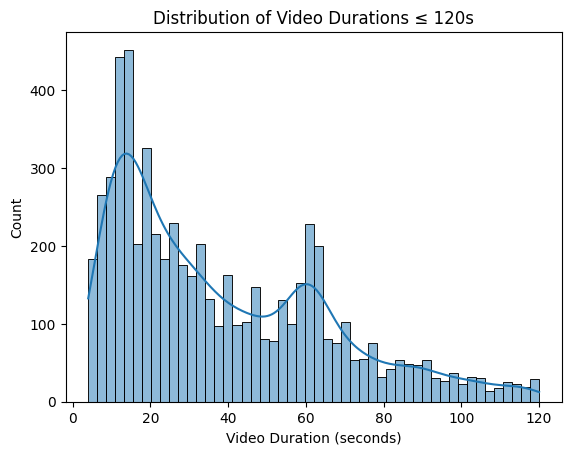

In [16]:
filtered = data_posts_hashtags[data_posts_hashtags["video_duration"] <= 120]
sns.histplot(filtered["video_duration"], bins=50, kde=True)
plt.title("Distribution of Video Durations ≤ 120s")
plt.xlabel("Video Duration (seconds)")
plt.ylabel("Count")
plt.show()

**From where are our posts**

In [17]:
data_german["country"].unique()

array([nan, 'Switzerland', 'Austria', 'Germany', 'Deutschland', 'France',
       'Italia', 'Türkiye', 'Österreich'], dtype=object)

In [18]:
data_english["country"].unique()

array([nan, 'Saudi Arabia', 'United States', 'USA', 'Pakistan', 'Czechia',
       'Bangladesh', 'Thailand', 'Indonesia',
       'Mandarin Oriental Hotel Mandarin Oriental', 'Kenya', 'Australia',
       'Nigeria', 'UK', 'United Kingdom', 'Sweden', 'Nederland',
       'Austria', 'Germany', 'Deutschland', 'France', 'Brasil', 'Egypt',
       'Österreich', 'مصر', 'Canada', 'Switzerland', 'Poland',
       'South Africa', 'South Korea'], dtype=object)

In [19]:
data_posts_hashtags["country"].unique()

array([nan, 'Saudi Arabia', 'المملكة العربية السعودية', 'United States',
       'USA', 'Pakistan', 'Philippines', 'Czechia', 'Bangladesh',
       'Bangkok 10300 Thailand', 'Thailand', 'Indonesia',
       'Mandarin Oriental Hotel Mandarin Oriental', 'Kenya', 'Australia',
       'Nigeria', 'Algeria', 'UK', 'United Kingdom', 'Switzerland',
       'Sweden', 'Nederland', 'Austria', 'Germany', 'Deutschland',
       'United Arab Emirates', 'France', 'Turkey', 'Italy', 'Italia',
       'Türkiye', 'Brazil', 'Brasil', 'Mexico', 'Egypt', 'Colombia',
       'Österreich', 'مصر', 'Canada', 'Greece', 'Japan', 'Poland',
       'South Africa', 'South Korea'], dtype=object)

In [20]:
country_fix = {
    "Deutschland": "Germany",
    "Österreich": "Austria",
    "UK": "United Kingdom",
    "USA": "United States",
    "Brasil": "Brazil",
    "Italia": "Italy",
    "مصر": "Egypt",
    "المملكة العربية السعودية": "Saudi Arabia",
    "Turkey": "Türkiye",
    "Bangkok 10300 Thailand": "Thailand",
    "Mandarin Oriental Hotel Mandarin Oriental": None,  # unclear
}

# Apply the fixes
data_posts_hashtags["country_clean"] = data_posts_hashtags["country"].replace(country_fix)

In [21]:
timezone_map = {
    "Germany": "Europe/Berlin",
    "France": "Europe/Paris",
    "Türkiye": "Europe/Istanbul",
    "Saudi Arabia": "Asia/Riyadh",
    "United States": "America/New_York",  # default — or map by state later
    "Canada": "America/Toronto",
    "Switzerland": "Europe/Zurich",
    "South Korea": "Asia/Seoul",
    "Pakistan": "Asia/Karachi",
    "Indonesia": "Asia/Jakarta",
    "Greece": "Europe/Athens",
    "Philippines": "Asia/Manila",
    "Sweden": "Europe/Stockholm",
    "Kenya": "Africa/Nairobi",
    "Egypt": "Africa/Cairo",
    "South Africa": "Africa/Johannesburg",
    "Austria": "Europe/Vienna",
    "United Kingdom": "Europe/London",
    "Nigeria": "Africa/Lagos",
    "Poland": "Europe/Warsaw",
    "Bangladesh": "Asia/Dhaka",
    "Australia": "Australia/Sydney",
    "Brazil": "America/Sao_Paulo",
    "Colombia": "America/Bogota",
    "United Arab Emirates": "Asia/Dubai",
    "Italy": "Europe/Rome",
    "Czechia": "Europe/Prague",
    "Thailand": "Asia/Bangkok",
    "Mexico": "America/Mexico_City",
    "Nederland": "Europe/Amsterdam",
    "Japan": "Asia/Tokyo",
    "Algeria": "Africa/Algiers"
}


In [22]:
# Convert createTimeISO to UTC datetime
data_posts_hashtags['utc_time'] = pd.to_datetime(data_posts_hashtags['createTimeISO'], utc=True)

# Nur für gültige Länder die lokale Zeit berechnen
data_posts_hashtags['local_time'] = [
    utc.astimezone(pytz.timezone(timezone_map[country])) if pd.notna(country) and country in timezone_map else pd.NaT
    for utc, country in zip(data_posts_hashtags['utc_time'], data_posts_hashtags['country'])
]

# Stunde extrahieren
data_posts_hashtags['hour'] = data_posts_hashtags['local_time'].astype(str).str.extract(r'(\d{2}):')[0].astype('Int64')


**From when are our posts**

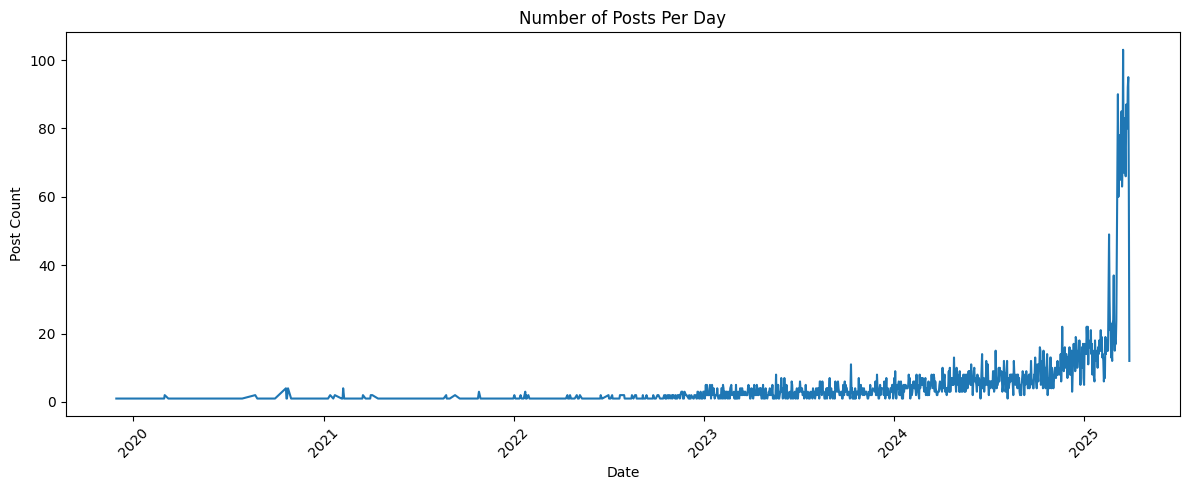

In [23]:
posts_per_day = data_posts_hashtags["createTimeISO"].dt.date.value_counts().sort_index()

plt.figure(figsize=(12, 5))
posts_per_day.plot()
plt.title("Number of Posts Per Day")
plt.xlabel("Date")
plt.ylabel("Post Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Are posts from before 2025 even relevant for us?

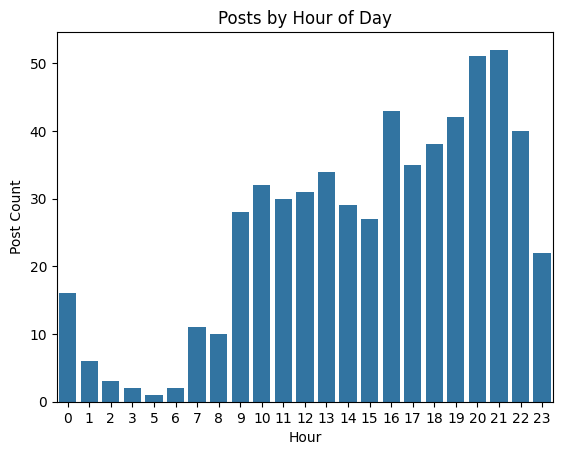

In [24]:
sns.countplot(x="hour", data=data_posts_hashtags)
plt.title("Posts by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Post Count")
plt.show()

People post most often in the evening between 20:00 to 22:00. During the night there are the least posts.

Need to double check that this is correct!

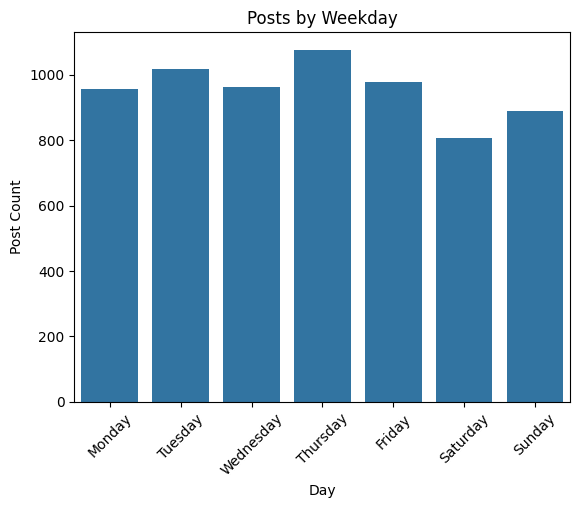

In [25]:
data_posts_hashtags["weekday"] = data_posts_hashtags["createTimeISO"].dt.day_name()

sns.countplot(x="weekday", data=data_posts_hashtags,
              order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Posts by Weekday")
plt.xlabel("Day")
plt.ylabel("Post Count")
plt.xticks(rotation=45)
plt.show()


**Influencer analysis**

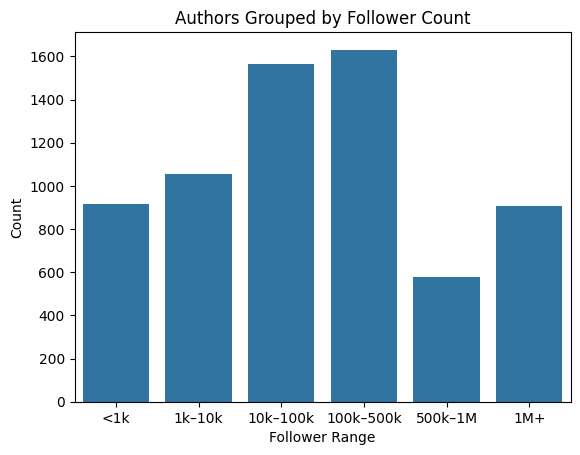

In [26]:
bins = [0, 1_000, 10_000, 100_000,500_000, 1_000_000, np.inf]
labels = ['<1k', '1k–10k', '10k–100k', '100k–500k', '500k–1M', '1M+']
data_posts_hashtags['fans_bin'] = pd.cut(data_posts_hashtags['author_fans'], bins=bins, labels=labels)

sns.countplot(x='fans_bin', data=data_posts_hashtags)
plt.title("Authors Grouped by Follower Count")
plt.xlabel("Follower Range")
plt.ylabel("Count")
plt.show()

### Hashtags Exploration

**Hashtags that were searched for**

/var/folders/rx/4hst61c96_bfm0gnxrq_5w_h0000gn/T/ipykernel_4485/172753211.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=search_hashtag_counts.values, y=search_hashtag_counts.index, palette="pastel")


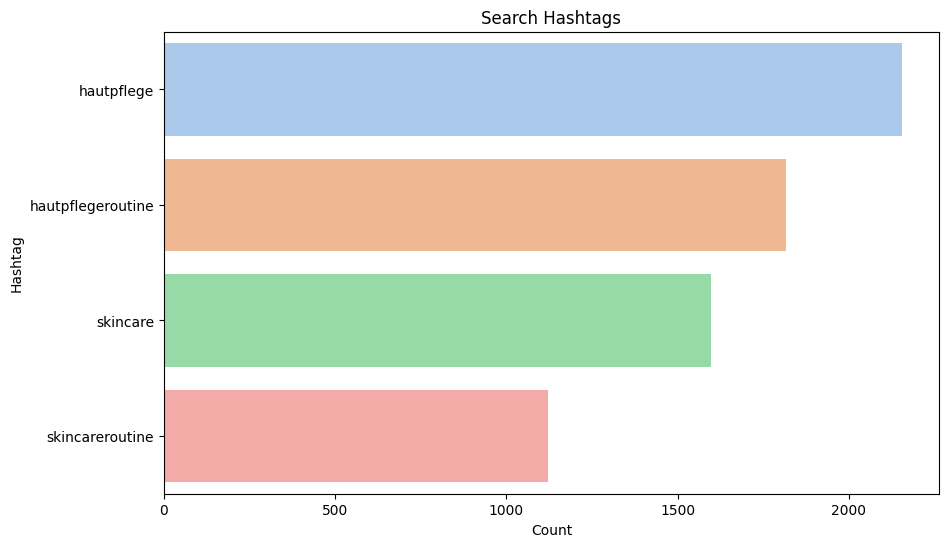

In [27]:
unique_searchhashtags = data_posts_hashtags['searchHashtag_name'].unique() 

search_hashtag_counts = data_posts_hashtags.searchHashtag_name.value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=search_hashtag_counts.values, y=search_hashtag_counts.index, palette="pastel")
plt.title("Search Hashtags")
plt.xlabel("Count")
plt.ylabel("Hashtag")
plt.show()

**Most common and engaging hashtags**

Sidenote: Looking in Bigquery found out that search_hashtag is actually not always part of the hashtags

In [28]:
data_hashtags = pd.read_csv("../data/posts_hashtags_selected_columns.csv")
data_hashtags = data_hashtags.drop(columns = ['bucketUrl'])
data_hashtags

,id,text,textLanguage,createTimeISO,isAd,author_nickName,author_signature,author_fans,video_duration,diggCount,shareCount,playCount,collectCount,commentCount,isSponsored,hashtag_name,hashtag_title,searchHashtag_name,searchHashtag_views,location_address
0,7472461334404238614,Straffer Hals mit diesen Schritten 👍 #halsfalt...,de,2025-02-17T18:46:26.000Z,False,Face Fitness Anti Aging,Falten Frei ohne Botox\nAnti Aging mit eigenen...,233400,112,168,15,6113,121,1,False,halsfalten,NaN,hautpflege,2700000000,"Marienplatz, 80331 München, Germany"
1,7472461334404238614,Straffer Hals mit diesen Schritten 👍 #halsfalt...,de,2025-02-17T18:46:26.000Z,False,Face Fitness Anti Aging,Falten Frei ohne Botox\nAnti Aging mit eigenen...,233400,112,168,15,6113,121,1,False,hautpflege,NaN,hautpflege,2700000000,"Marienplatz, 80331 München, Germany"
2,7472461334404238614,Straffer Hals mit diesen Schritten 👍 #halsfalt...,de,2025-02-17T18:46:26.000Z,False,Face Fitness Anti Aging,Falten Frei ohne Botox\nAnti Aging mit eigenen...,233400,112,168,15,6113,121,1,False,facefitness,NaN,hautpflege,2700000000,"Marienplatz, 80331 München, Germany"
3,7472533937667968278,Aquafacial🫧 Boost für deine Haut💆🏻‍♀️ Tief ger...,de,2025-02-17T23:28:17.000Z,False,SKINID_STUDIO,all about ✨Aquafacial & Microneedling✨ \nat @k...,32,10,17,1,940,2,2,False,appointment,NaN,hautpflege,2700000000,"Nurnberg, Bavaria, Germany"
4,7472533937667968278,Aquafacial🫧 Boost für deine Haut💆🏻‍♀️ Tief ger...,de,2025-02-17T23:28:17.000Z,False,SKINID_STUDIO,all about ✨Aquafacial & Microneedling✨ \nat @k...,32,10,17,1,940,2,2,False,treatment,NaN,hautpflege,2700000000,"Nurnberg, Bavaria, Germany"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12266,7459833919379131678,#fypシ #skincare #skincareroutine #storytimes #...,un,2025-01-14T18:05:53.000Z,False,Alchemy,NaN,35900,60,3845,94,277200,594,75,False,tiktok,NaN,skincareroutine,155600000000,NaN
12267,7335544341332643118,My mom rates my skincare routine👀🥴,en,2024-02-14T19:39:09.000Z,False,Theresa Krug,✨Lifestyle • DIY • Skincare/Makeup✨\nFlorida📍🌴...,2900000,60,9826,18,162100,738,58,False,NaN,NaN,skincareroutine,155600000000,NaN
12268,7456398001754443030,5-step rice skincare 🍚🤍 @anua_global Rice Enzy...,en,2025-01-05T11:52:32.000Z,False,blueyoobin,🦋\nkoreanskincare with me\n🇰🇷📍Paris\nyoobinblu...,58900,22,744300,15700,7500000,125800,3247,False,NaN,NaN,skincareroutine,155600000000,NaN
12269,7456398001754443030,5-step rice skincare 🍚🤍 @anua_global Rice Enzy...,en,2025-01-05T11:52:32.000Z,False,blueyoobin,🦋\nkoreanskincare with me\n🇰🇷📍Paris\nyoobinblu...,58900,22,744300,15700,7500000,125800,3247,False,NaN,NaN,skincareroutine,155600000000,NaN


In [29]:
(data_hashtags['searchHashtag_name'] == data_hashtags['hashtag_name']).sum()

np.int64(425)

/var/folders/rx/4hst61c96_bfm0gnxrq_5w_h0000gn/T/ipykernel_4485/2132663915.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtag_counts.values, y=hashtag_counts.index, palette="pastel")


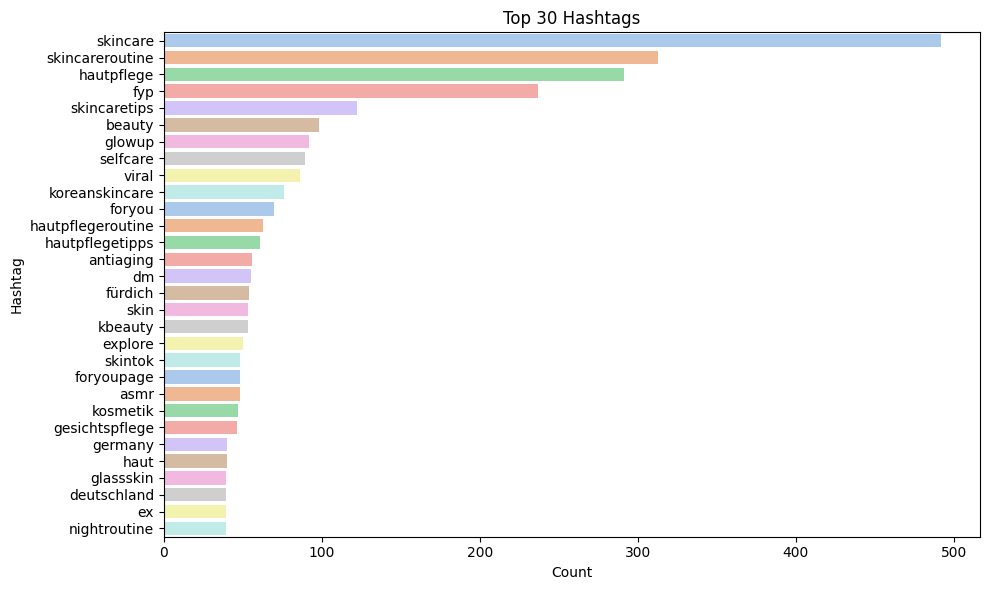

In [30]:
unique_hashtags = data_hashtags['hashtag_name'].unique() #4545 unique hashtags

hashtag_counts = data_hashtags.hashtag_name.value_counts().head(30)  # top 30

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=hashtag_counts.values, y=hashtag_counts.index, palette="pastel")
plt.title("Top 30 Hashtags")
plt.xlabel("Count")
plt.ylabel("Hashtag")
plt.tight_layout()
plt.show()

In [33]:
hashtag_post_counts = (
    data_hashtags.groupby('hashtag_name')['id']
    .nunique()
    .sort_values(ascending=False)
)

quantiles = hashtag_post_counts.quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.975, 0.99])
print("Quantile der Postanzahl pro Hashtag:")
print(quantiles)

Quantile der Postanzahl pro Hashtag:
0.250     1.000
0.500     1.000
0.750     2.000
0.900     3.000
0.950     6.000
0.975    11.425
0.990    29.000
Name: id, dtype: float64


/var/folders/rx/4hst61c96_bfm0gnxrq_5w_h0000gn/T/ipykernel_4485/2210378587.py:62: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/hannahschlaucher/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


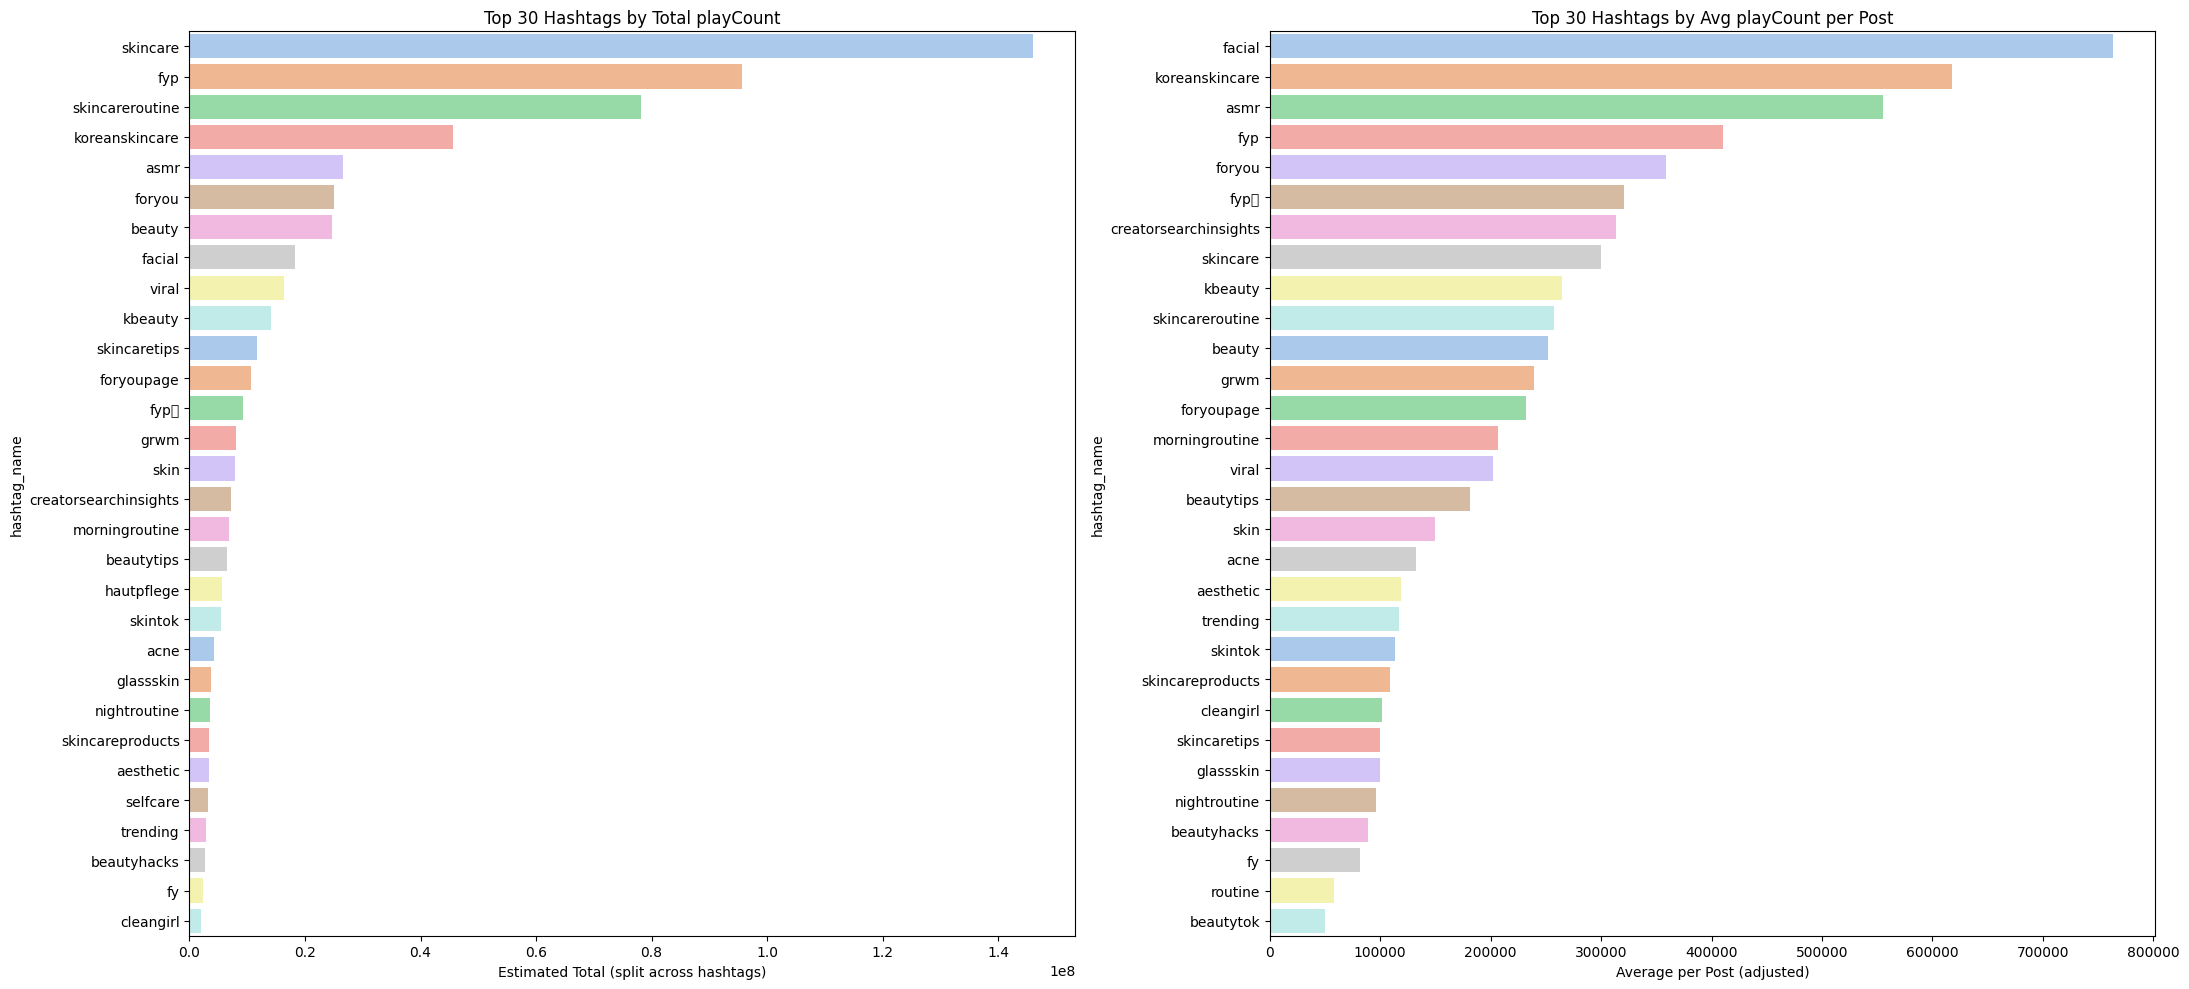

/var/folders/rx/4hst61c96_bfm0gnxrq_5w_h0000gn/T/ipykernel_4485/2210378587.py:62: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/hannahschlaucher/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


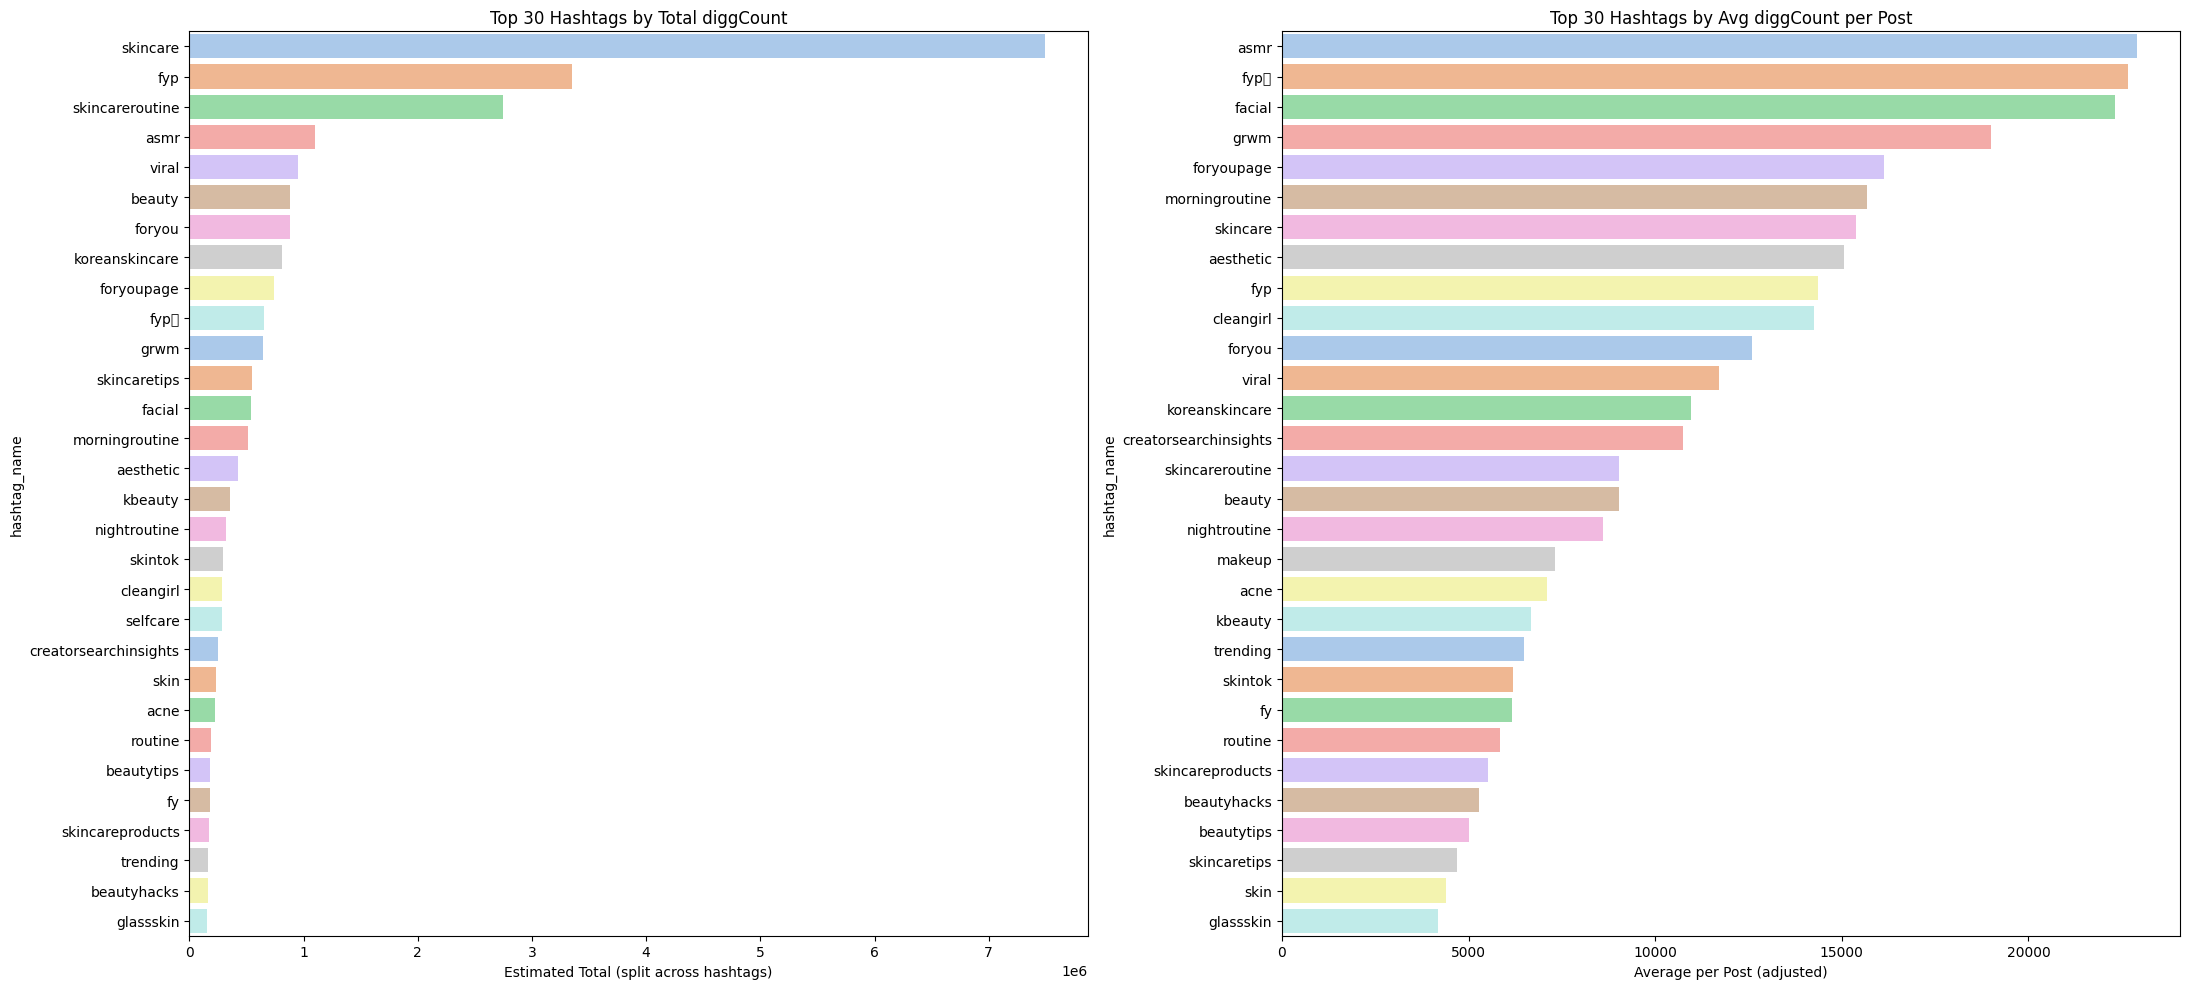

/var/folders/rx/4hst61c96_bfm0gnxrq_5w_h0000gn/T/ipykernel_4485/2210378587.py:62: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/hannahschlaucher/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


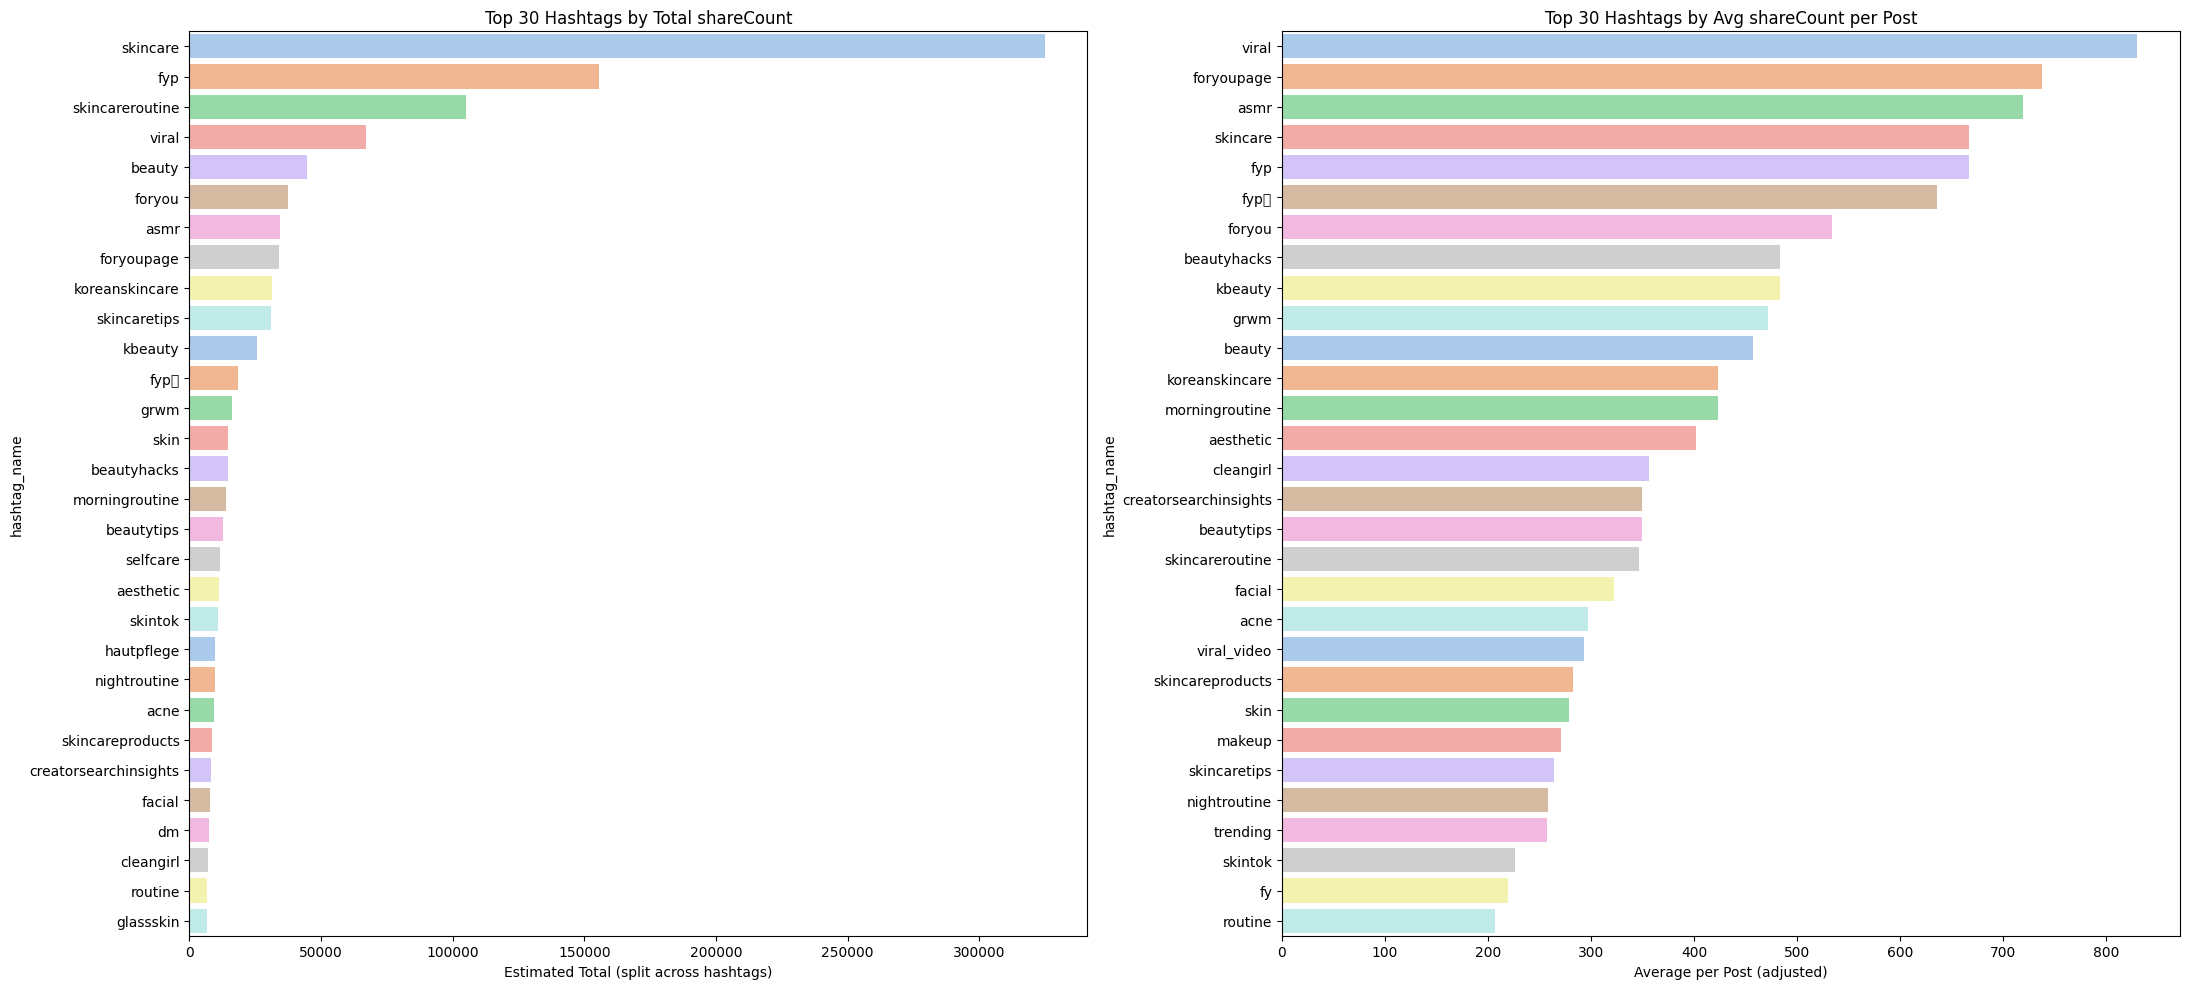

/var/folders/rx/4hst61c96_bfm0gnxrq_5w_h0000gn/T/ipykernel_4485/2210378587.py:62: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/hannahschlaucher/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


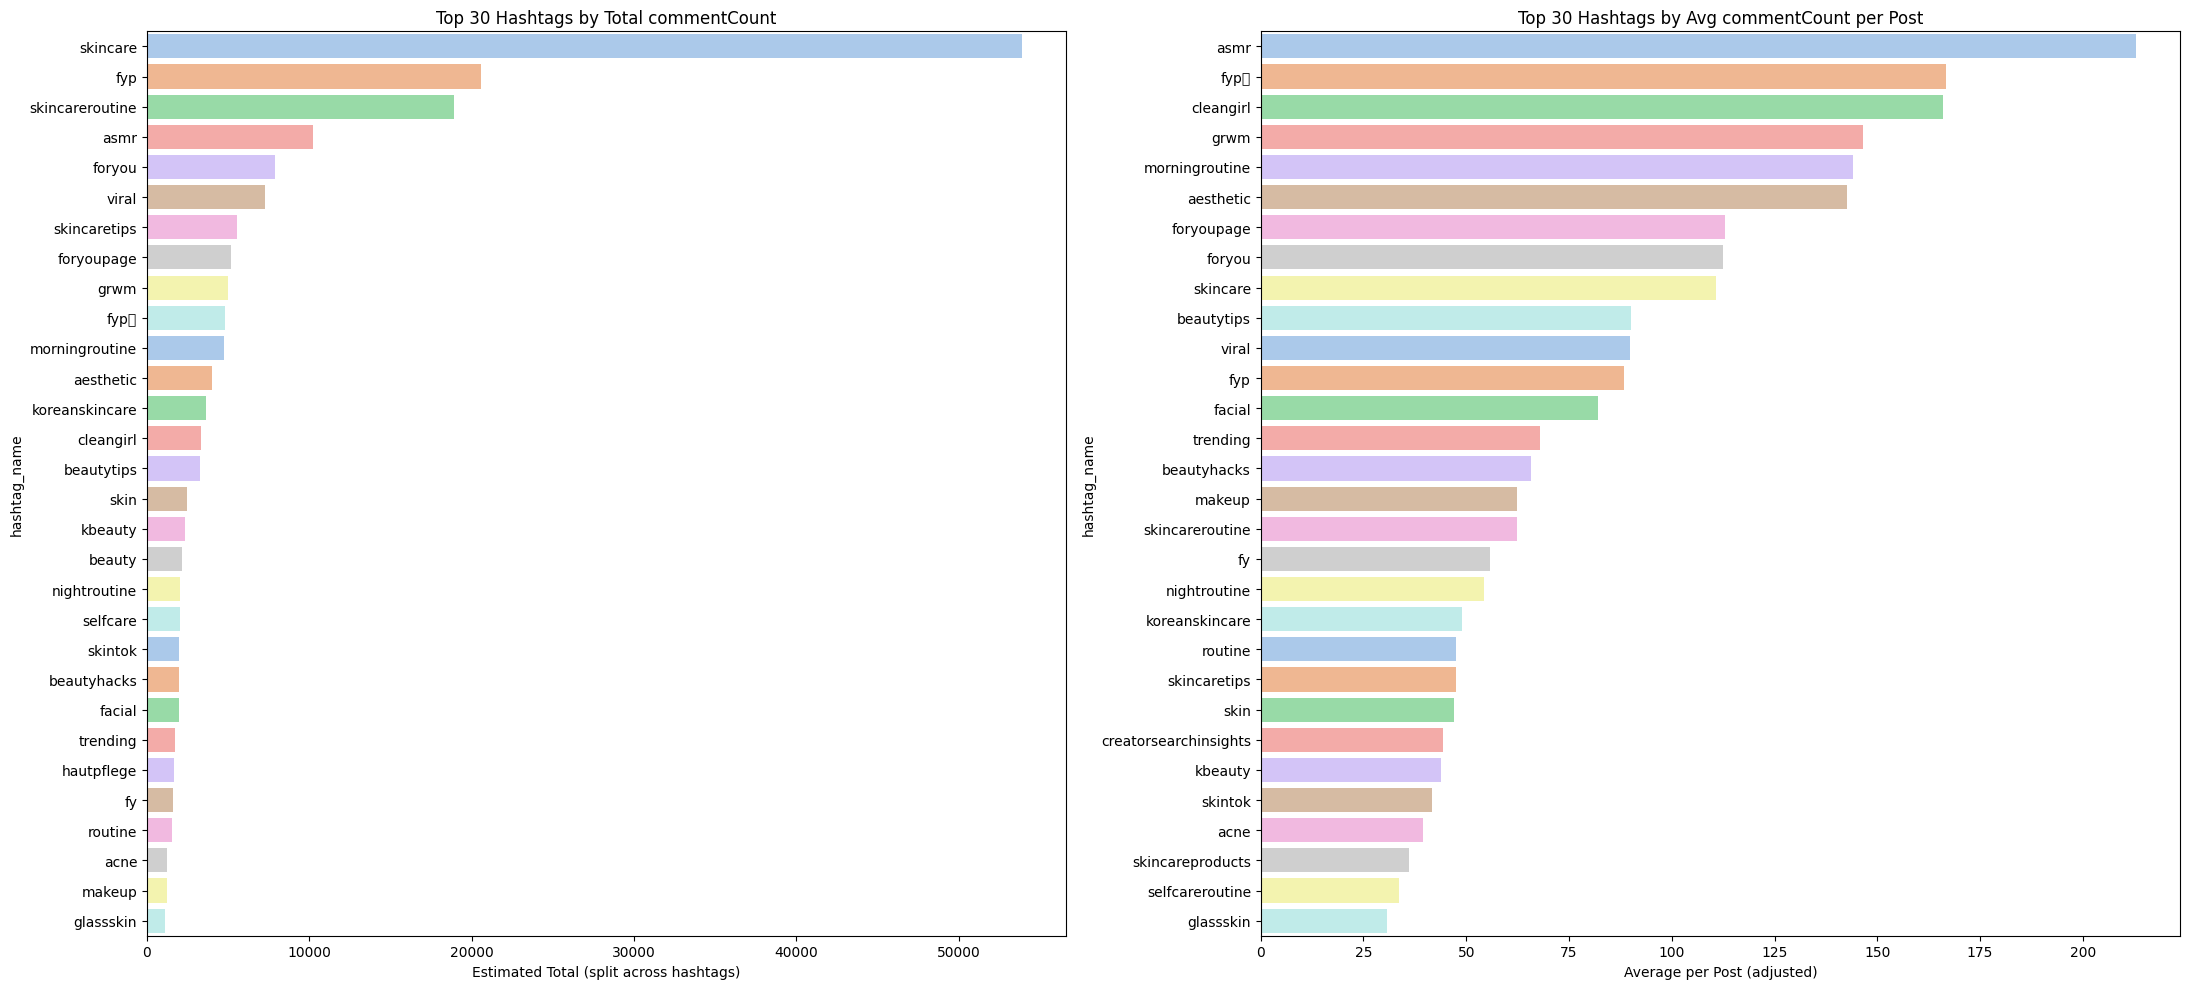

In [34]:
#Let's look at the number of views for each Hashtag

# number of hashtags per post
data_hashtags['hashtag_count'] = data_hashtags.groupby('id')['hashtag_name'].transform('count')

# Distribute metric
for metric in ['playCount', 'diggCount', 'shareCount', 'commentCount']:
    data_hashtags[f'{metric}_per_hashtag'] = data_hashtags[metric] / data_hashtags['hashtag_count']

def plot_sum_and_avg_by_metric(data):
    metrics = ['playCount', 'diggCount', 'shareCount', 'commentCount']
    
    # Calculate fair share per hashtag
    data['hashtag_count'] = data.groupby('id')['hashtag_name'].transform('count')
    for metric in metrics:
        data[f'{metric}_per_hashtag'] = data[metric] / data['hashtag_count']
    
    for metric in metrics:
        metric_col = f'{metric}_per_hashtag'
        
        agg = (
            data.groupby('hashtag_name')
            .agg(
                post_count=('id', 'nunique'),
                total_metric=(metric_col, 'sum')
            )
            .assign(avg_metric_per_post=lambda x: x['total_metric'] / x['post_count'])
        )

        # Filter: only hashtags with at least 30 posts
        agg = agg[agg['post_count'] >= 20]

        # Top 30 by total and by average
        top_total = agg.sort_values('total_metric', ascending=False).head(30)
        top_avg = agg.sort_values('avg_metric_per_post', ascending=False).head(30)

        # Plot
        fig, axes = plt.subplots(1, 2, figsize=(22, 10))

        sns.barplot(
            x=top_total['total_metric'],
            y=top_total.index,
            hue=top_total.index,
            palette='pastel',
            legend=False,
            ax=axes[0]
        )
        axes[0].set_title(f"Top 30 Hashtags by Total {metric}")
        axes[0].set_xlabel("Estimated Total (split across hashtags)")

        sns.barplot(
            x=top_avg['avg_metric_per_post'],
            y=top_avg.index,
            hue=top_avg.index,
            palette='pastel',
            legend=False,
            ax=axes[1]
        )
        axes[1].set_title(f"Top 30 Hashtags by Avg {metric} per Post")
        axes[1].set_xlabel("Average per Post (adjusted)")

        plt.tight_layout()
        plt.show()


plot_sum_and_avg_by_metric(data_hashtags)